# load mmm samples

In [1]:
%include "EnableIPythonDisplay.swift"

import PythonKit
import Foundation

let np = Python.import("numpy")
let plt = Python.import("matplotlib.pyplot")
IPythonDisplay.shell.enable_matplotlib("inline")

%include "Sources/MotionDataset/MotionFrame.swift"
%include "Sources/MotionDataset/MotionSample.swift"
%include "Sources/MotionDataset/MotionDataset.swift"

In [2]:
// TODO: create api for saving the image

In [3]:
let mmmURL = URL(fileURLWithPath: "/notebooks/m2l.gt/data/2017-06-22/00003_mmm.xml")
let annotationsURL = URL(fileURLWithPath: "/notebooks/m2l.gt/data/2017-06-22/00003_annotations.json")
let motionSample = MotionSample(mmmURL: mmmURL, annotationsURL: annotationsURL)
print(motionSample.describe())

MotionSample(timestamp: 5.68, motions: 569, annotations: 1)


In [4]:
print(motionSample.annotations)

["A human walking"]


In [5]:
// + create class that loads dataset 
// TODO: and converts it
// + generate n_max mmm and annotations filenames
// + load MotionSample
// TODO: make it faster

In [6]:
let datasetFolderURL = URL(fileURLWithPath: "/notebooks/m2l.gt/data/2017-06-22/")

let date = Date()
var motionDataset = MotionDataset(datasetFolderURL: datasetFolderURL, maxSamples: 20)
print(abs(date.timeIntervalSinceNow))

Sample 1, 00001_mmm.xml, 00001_annotations.json
Sample 2, 00002_mmm.xml, 00002_annotations.json
Sample 3, 00003_mmm.xml, 00003_annotations.json
Sample 4, 00004_mmm.xml, 00004_annotations.json
Sample 5, 00005_mmm.xml, 00005_annotations.json
Sample 6, 00006_mmm.xml, 00006_annotations.json
Sample 7, 00007_mmm.xml, 00007_annotations.json
Sample 8, 00008_mmm.xml, 00008_annotations.json
Sample 9, 00009_mmm.xml, 00009_annotations.json
Sample 10, 00010_mmm.xml, 00010_annotations.json
Sample 11, 00011_mmm.xml, 00011_annotations.json
Sample 12, 00012_mmm.xml, 00012_annotations.json
** Sample 12 doesn't exist.
Sample 13, 00013_mmm.xml, 00013_annotations.json
Sample 14, 00014_mmm.xml, 00014_annotations.json
Sample 15, 00015_mmm.xml, 00015_annotations.json
Sample 16, 00016_mmm.xml, 00016_annotations.json
Sample 17, 00017_mmm.xml, 00017_annotations.json
Sample 18, 00018_mmm.xml, 00018_annotations.json
Sample 19, 00019_mmm.xml, 00019_annotations.json
Sample 20, 00020_mmm.xml, 00020_annotations.json
1

In [7]:
print(motionDataset.describe())

MotionDataset(motionSamples: 19)


In [8]:
// TODO: pad/clip motions to maxTimestep

In [9]:
for motionSample in motionDataset.motionSamples {
    print(motionSample.describe())
}

MotionSample(timestamp: 3.77, motions: 378, annotations: 1)
MotionSample(timestamp: 5.3, motions: 531, annotations: 1)
MotionSample(timestamp: 5.68, motions: 569, annotations: 1)
MotionSample(timestamp: 5.65, motions: 566, annotations: 2)
MotionSample(timestamp: 5.88, motions: 589, annotations: 1)
MotionSample(timestamp: 6.15, motions: 616, annotations: 2)
MotionSample(timestamp: 5.79, motions: 580, annotations: 2)
MotionSample(timestamp: 6.19, motions: 620, annotations: 1)
MotionSample(timestamp: 6.29, motions: 630, annotations: 3)
MotionSample(timestamp: 6.23, motions: 624, annotations: 1)
MotionSample(timestamp: 5.5, motions: 551, annotations: 2)
MotionSample(timestamp: 5.65, motions: 566, annotations: 1)
MotionSample(timestamp: 5.43, motions: 544, annotations: 1)
MotionSample(timestamp: 5.87, motions: 588, annotations: 1)
MotionSample(timestamp: 5.39, motions: 540, annotations: 9)
MotionSample(timestamp: 4.4, motions: 441, annotations: 3)
MotionSample(timestamp: 5.51, motions: 552,

# visualize sample

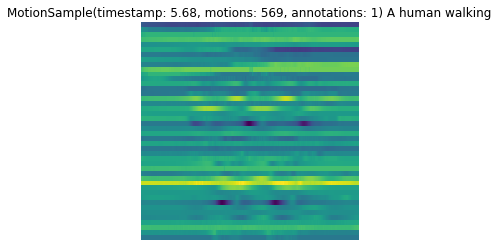

In [10]:
func plotMotionSample(motionSample: MotionSample, grouppedJoints: Bool) {
    // let time = np.array(motionSample.motionFrames.map {$0.timestamp})
    var position = np.array([0])
    if grouppedJoints {
        position = np.array(motionSample.motionFrames.map {$0.grouppedJointPositions()})
    } else {
        position = np.array(motionSample.motionFrames.map {$0.jointPositions})        
    }
    
    let x = plt.subplots()
    // let fig = x[0]
    let ax = x[1]
    ax.imshow(position.T, interpolation: "nearest", extent: [0, 3, 0, 3], cmap: "viridis")
    ax.axis("off")
    ax.set_title("\(motionSample.describe()) \(motionSample.annotations[0])")

    plt.show()
}
plotMotionSample(motionSample: motionSample, grouppedJoints: false)

# group joints into sections of skeleton

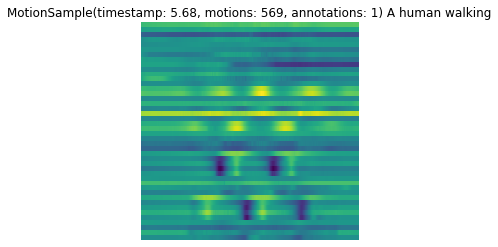

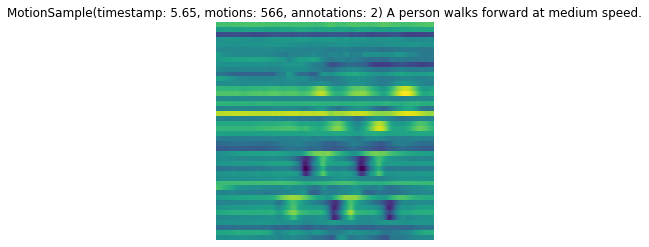

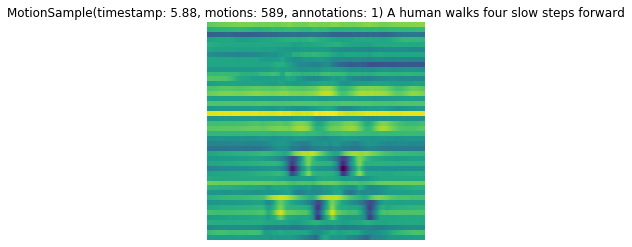

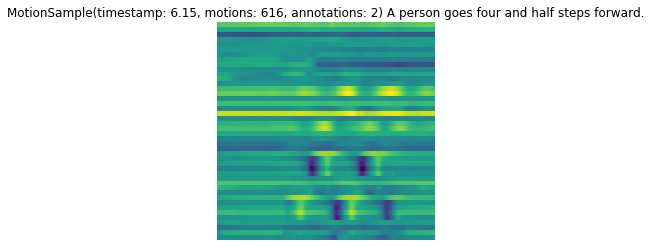

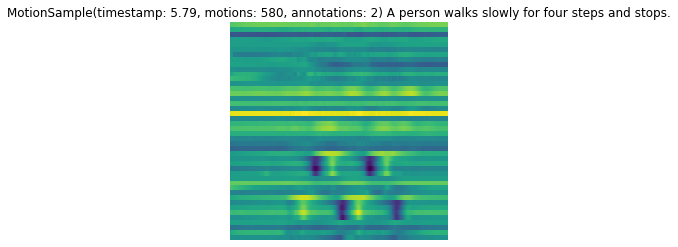

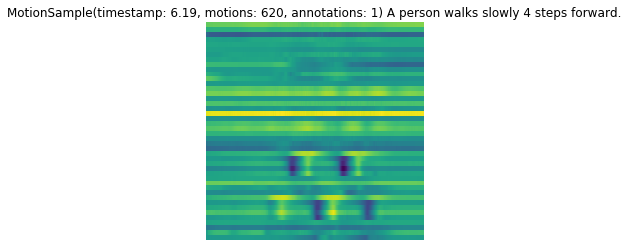

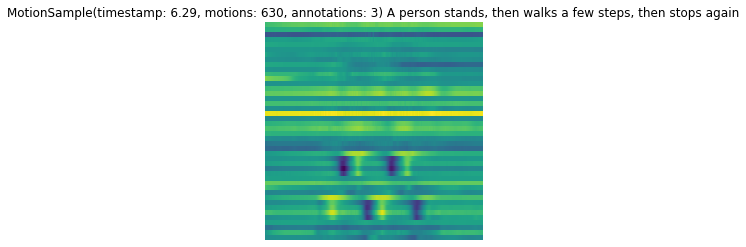

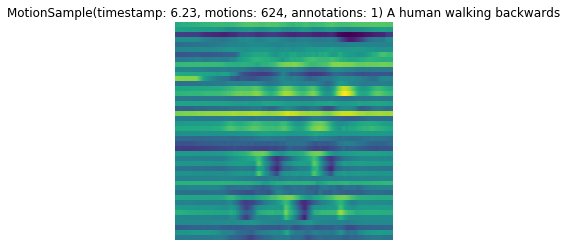

In [11]:
for motionSample in motionDataset.motionSamples[2..<10] {
    // print(motionSample.describe())
    // print(motionSample.annotations)
    plotMotionSample(motionSample: motionSample, grouppedJoints: true)
}

In [12]:
// TODO: check is_moving flag values